# Proyecto Análisis Numérico

El objetivo de este proyecto, es usar un algoritmo de interpolación que ajuste los datos elegidos en relación con alguna disciplina para estimar valores de años faltantes.

## Primera parte

Inicialmente, consideramos importante hacer una adecuada limpieza de datos para posteriormente, darle sentido a nuestro algoritmo, para esto, consideramos los siguientes pasos:

### 1. Comprensión de los datos

En primer lugar, evidenciamos que las columnas desde el excel, tratan de un modelo acumulativo que intenta predecir el uso de tecnologías.

Evidenciamos que los datos son de tipo numérico, que las columnas no están completas y que se deben reajustar los datos.

In [45]:
import pandas as pd

# Cargar el archivo Excel
file_path = '../assets/Proyecto Final ANM 2024-2.xlsx'
df = pd.read_excel(file_path, sheet_name='cumulative-number-of-notable-ai')

# Mostrar las primeras filas del DataFrame
print(df.tail())

# Mostrar información sobre las columnas y tipos de datos
print(df.info())

   Biology Unnamed: 1 Games Unnamed: 3 Image Generation Unnamed: 5 Language  \
31    2020          8  2020         37             2020         24     2020   
32    2021         14  2021         41             2021         32     2021   
33    2022         26  2022         45             2022         42     2022   
34    2023        NaN  2023        NaN             2023        NaN     2023   
35    2024         33  2024         45             2024         54     2024   

   Unnamed: 7 Recommendation Unnamed: 9 Robotics Unnamed: 11 Speech  \
31        192           2020         19     2020          11   2020   
32        229           2021         19     2021          12   2021   
33        274           2022         19     2022          14   2022   
34        NaN           2023        NaN     2023         NaN   2023   
35        356           2024         19     2024          23   2024   

   Unnamed: 13 Vision Unnamed: 15  
31          30   2020         195  
32          34   2021     

In [28]:
df

,Biology,Unnamed: 1,Games,Unnamed: 3,Image Generation,Unnamed: 5,Language,Unnamed: 7,Recommendation,Unnamed: 9,Robotics,Unnamed: 11,Speech,Unnamed: 13,Vision,Unnamed: 15
0,Year,Cumulative number of AI systems by domain,Year,Cumulative number of AI systems by domain,Year,Cumulative number of AI systems by domain,Year,Cumulative number of AI systems by domain,Year,Cumulative number of AI systems by domain,Year,Cumulative number of AI systems by domain,Year,Cumulative number of AI systems by domain,Year,Cumulative number of AI systems by domain
1,1990,0,1990,4,1990,0,1990,2,1990,0,1990,5,1990,7,1990,17
2,1991,0,1991,4,1991,0,1991,3,1991,0,1991,5,1991,8,1991,17
3,1992,0,1992,5,1992,0,1992,3,1992,0,1992,5,1992,9,1992,18
4,1993,0,1993,5,1993,0,1993,4,1993,0,1993,5,1993,9,1993,18
5,1994,0,1994,5,1994,0,1994,4,1994,1,1994,5,1994,9,1994,18
6,1995,0,1995,5,1995,0,1995,5,1995,1,1995,5,1995,9,1995,19
7,1996,0,1996,5,1996,0,1996,6,1996,1,1996,5,1996,9,1996,20
8,1997,0,1997,6,1997,0,1997,7,1997,1,1997,5,1997,10,1997,22
9,1998,0,1998,6,1998,0,1998,7,1998,2,1998,5,1998,10,1998,23


### 2. Eliminación de filas innecesarias y datos nulos.

Para ajustar los datos, al tener columnas combinadas, simplemente las columnas van con el nombre de título superior, y una '_' que indica su relación con la subcolumna

Por ejemplo, para year, si está bajo la columna biology, ahora será: biology_year

Además, revisamos si existen datos nulos, en este caso particular evidenciamos que sí existen datos nulos, en el siguiente paso, tomamos una decisión al respecto.

Finalmente, para completar el diseño, buscamos específicamente los años en los que hay datos nulos, ya que sabemos que sólo hay datos nulos, en los values.

In [58]:
# Renombrar columnas de manera más adecuada
df.columns = ['Biology_year', 'Biology_Values', 'Games_year', 'Games_Values', 
              'Image_Generation_year', 'Image_Generation_Values', 'Language_year', 
              'Language_Values', 'Recommendation_year', 'Recommendation_Values', 
              'Robotics_year', 'Robotics_Values', 'Speech_year', 'Speech_Values', 
              'Vision_year', 'Vision_Values']

# Eliminar la primera fila que contiene descripciones
df_clean = df.drop(index=0)
df_compare = df.drop(index=0)

# Verificar si hay valores nulos en el dataset
print(df_clean.isnull().sum())

# Mostrar las primeras filas del dataset limpio
print(df_clean.tail())

columnas_a_convertir = ['Biology_Values', 'Games_Values', 'Image_Generation_Values', 
                        'Language_Values', 'Recommendation_Values', 'Robotics_Values', 
                        'Speech_Values', 'Vision_Values']


Biology_year               0
Biology_Values             4
Games_year                 0
Games_Values               4
Image_Generation_year      0
Image_Generation_Values    4
Language_year              0
Language_Values            4
Recommendation_year        0
Recommendation_Values      4
Robotics_year              0
Robotics_Values            4
Speech_year                0
Speech_Values              4
Vision_year                0
Vision_Values              4
dtype: int64
   Biology_year Biology_Values Games_year Games_Values Image_Generation_year  \
31         2020              8       2020           37                  2020   
32         2021             14       2021           41                  2021   
33         2022             26       2022           45                  2022   
34         2023            NaN       2023          NaN                  2023   
35         2024             33       2024           45                  2024   

   Image_Generation_Values Language_year L

In [47]:
# Definir nuevamente las columnas con valores nulos y ejecutar el análisis
null_columns = df_clean.columns[df_clean.isnull().any()]

# Extraer los años (Como los años son iguales en todas las columnas, usamos el de biology_year) y las ubicaciones con valores nulos
years_with_nulls = df_clean[['Biology_year'] + list(null_columns)].loc[df_clean[null_columns].isnull().any(axis=1)]

# Mostrar los años y las columnas que tienen valores nulos
years_with_nulls


,Biology_year,Biology_Values,Games_Values,Image_Generation_Values,Language_Values,Recommendation_Values,Robotics_Values,Speech_Values,Vision_Values
14,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Revisión de los datos

Sabiendo los años y las columnas que contienen datos nulos, exportamos nuestro documento con esta información en mente para ser procesada por el algoritmo de esplines cúbicos (que decidimos usar)

In [48]:
# Guardar el DataFrame con los años y valores nulos en un archivo Excel, con las tablas actualizadas y listas para el análisis

output_file_path = '../assets/cleaned_data.xlsx'
df_clean.to_excel(output_file_path, index=False)

output_file_path


'../assets/cleaned_data.xlsx'

### 4. Análisis y generación de los datos

Usamos el algoritmo de splines cúbicos para poner los años faltantes

In [49]:
import numpy as np
from scipy.interpolate import CubicSpline

# Convertir las columnas a numéricas si no lo están
df_clean[columnas_a_convertir] = df_clean[columnas_a_convertir].apply(pd.to_numeric, errors='coerce')

# Iterar sobre cada columna y aplicar la interpolación solo en los valores faltantes
for column in columnas_a_convertir:
    # Extraer los índices de los valores no nulos
    x = np.arange(len(df_clean))
    y = df_clean[column].values
    
    # Crear una máscara para los valores no nulos
    mask = ~np.isnan(y)
    
    # Interpolación por splines cúbicos solo en los valores nulos
    spline = CubicSpline(x[mask], y[mask])
    
    # Solo reemplazar los valores que son nulos
    y_interpolated = y.copy()
    y_interpolated[~mask] = spline(x[~mask])
    
    # Asegurarnos de que no haya valores negativos, los ajustamos a 0 si es necesario
    y_interpolated = np.where(y_interpolated < 0, 0, y_interpolated)
    
    # Actualizar la columna en el DataFrame
    df_clean[column] = y_interpolated

# Verificar si quedan valores nulos después de la interpolación
print(df_clean.isnull().sum())

# Mostrar las primeras filas para observar el resultado
print(df_clean.head())


Biology_year               0
Biology_Values             0
Games_year                 0
Games_Values               0
Image_Generation_year      0
Image_Generation_Values    0
Language_year              0
Language_Values            0
Recommendation_year        0
Recommendation_Values      0
Robotics_year              0
Robotics_Values            0
Speech_year                0
Speech_Values              0
Vision_year                0
Vision_Values              0
dtype: int64
  Biology_year  Biology_Values Games_year  Games_Values Image_Generation_year  \
1         1990             0.0       1990           4.0                  1990   
2         1991             0.0       1991           4.0                  1991   
3         1992             0.0       1992           5.0                  1992   
4         1993             0.0       1993           5.0                  1993   
5         1994             0.0       1994           5.0                  1994   

   Image_Generation_Values Language_

In [50]:
df_clean

,Biology_year,Biology_Values,Games_year,Games_Values,Image_Generation_year,Image_Generation_Values,Language_year,Language_Values,Recommendation_year,Recommendation_Values,Robotics_year,Robotics_Values,Speech_year,Speech_Values,Vision_year,Vision_Values
1,1990,0.000000,1990,4.000000,1990,0.000000,1990,2.000000,1990,0.000000,1990,5.000000,1990,7.000000,1990,17.000000
2,1991,0.000000,1991,4.000000,1991,0.000000,1991,3.000000,1991,0.000000,1991,5.000000,1991,8.000000,1991,17.000000
3,1992,0.000000,1992,5.000000,1992,0.000000,1992,3.000000,1992,0.000000,1992,5.000000,1992,9.000000,1992,18.000000
4,1993,0.000000,1993,5.000000,1993,0.000000,1993,4.000000,1993,0.000000,1993,5.000000,1993,9.000000,1993,18.000000
5,1994,0.000000,1994,5.000000,1994,0.000000,1994,4.000000,1994,1.000000,1994,5.000000,1994,9.000000,1994,18.000000
6,1995,0.000000,1995,5.000000,1995,0.000000,1995,5.000000,1995,1.000000,1995,5.000000,1995,9.000000,1995,19.000000
7,1996,0.000000,1996,5.000000,1996,0.000000,1996,6.000000,1996,1.000000,1996,5.000000,1996,9.000000,1996,20.000000
8,1997,0.000000,1997,6.000000,1997,0.000000,1997,7.000000,1997,1.000000,1997,5.000000,1997,10.000000,1997,22.000000
9,1998,0.000000,1998,6.000000,1998,0.000000,1998,7.000000,1998,2.000000,1998,5.000000,1998,10.000000,1998,23.000000
10,1999,0.000000,1999,6.000000,1999,0.000000,1999,9.000000,1999,2.000000,1999,5.000000,1999,10.000000,1999,24.000000


In [53]:
# Guardar el DataFrame con los años y valores nulos en un archivo Excel
output_file_path = '../assets/final_data.xlsx'
df_clean.to_excel(output_file_path, index=False)

output_file_path


'../assets/final_data.xlsx'

### 5. Gráficos de Comparación

La comparación no va 1 a 1, porque había datos vacíos y para esos se usó el algoritmo de interpolación. Sin embargo, con objetivos académicos se va a crear un df que usa sólo interpolación con esplines cúbicos para compararse con los datos originales y así tener una visión de la manera en la que funcionaron los datos

Biology_year                            0
Biology_Values                          0
Games_year                              0
Games_Values                            0
Image_Generation_year                   0
Image_Generation_Values                 0
Language_year                           0
Language_Values                         0
Recommendation_year                     0
Recommendation_Values                   0
Robotics_year                           0
Robotics_Values                         0
Speech_year                             0
Speech_Values                           0
Vision_year                             0
Vision_Values                           0
interpolated_Biology_Values             0
interpolated_Games_Values               0
interpolated_Image_Generation_Values    0
interpolated_Language_Values            0
interpolated_Recommendation_Values      0
interpolated_Robotics_Values            0
interpolated_Speech_Values              0
interpolated_Vision_Values        

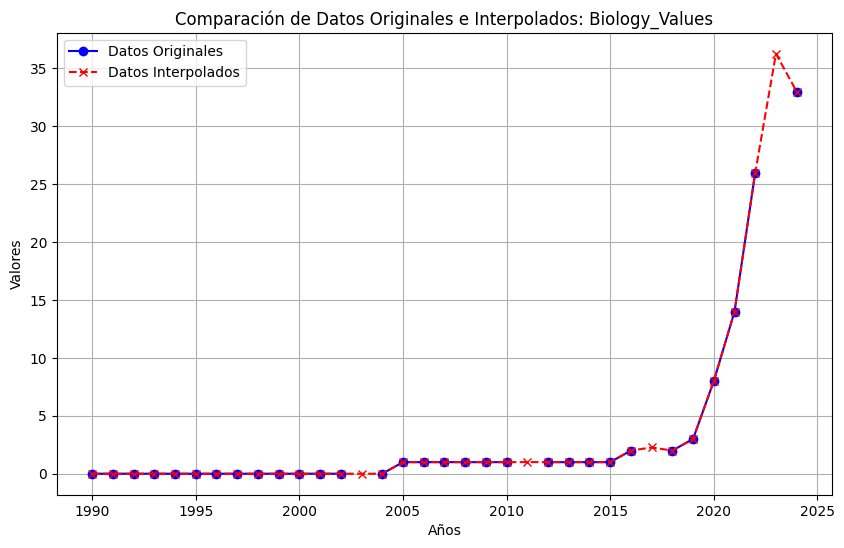

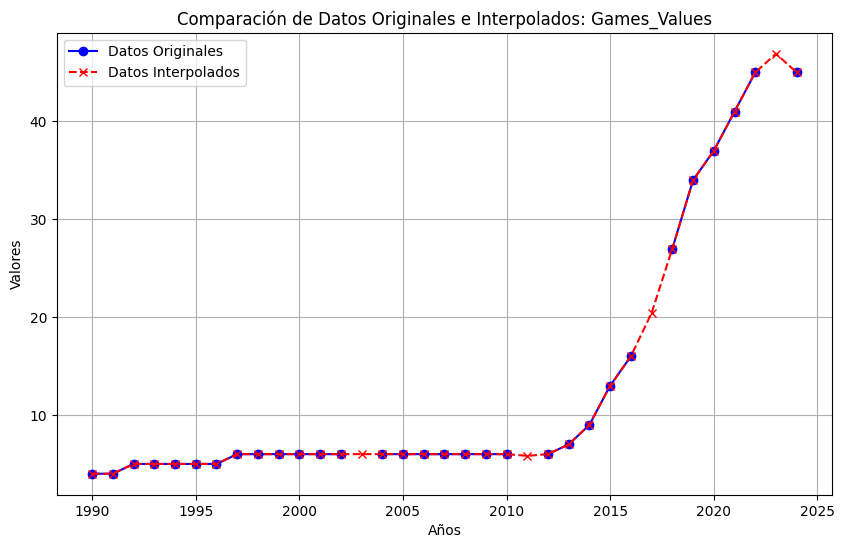

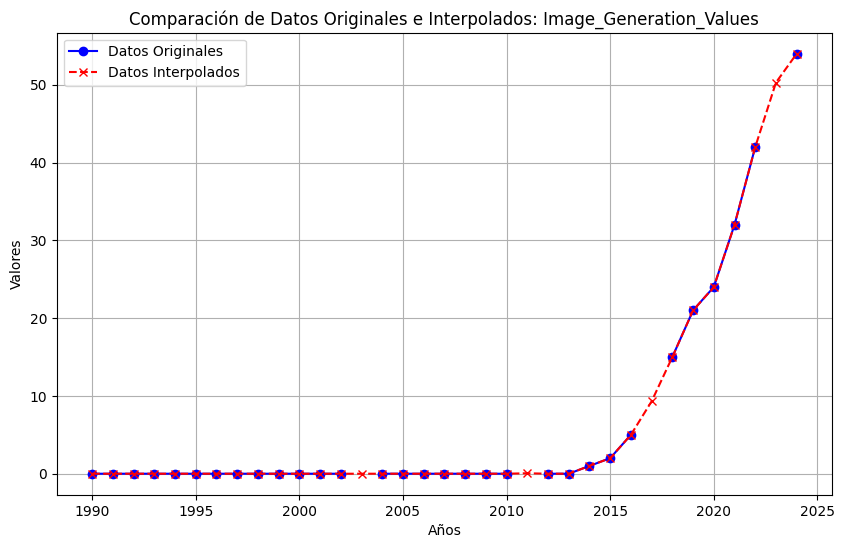

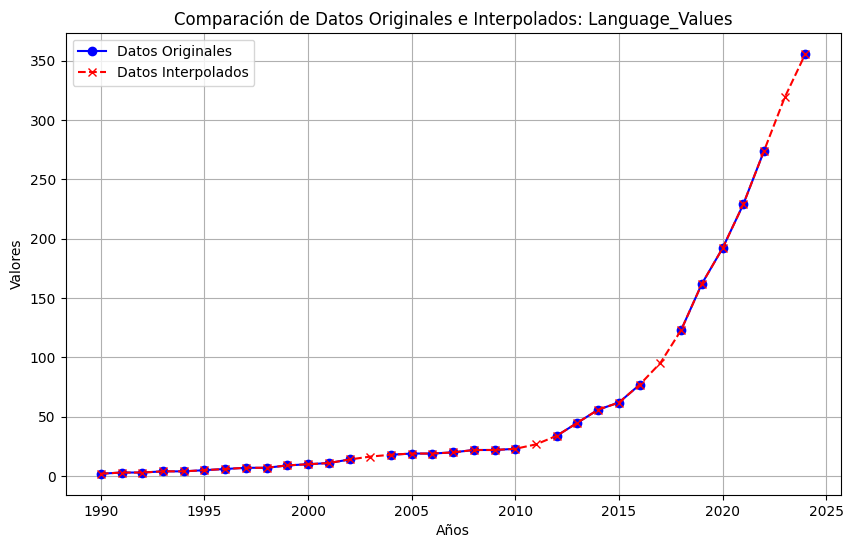

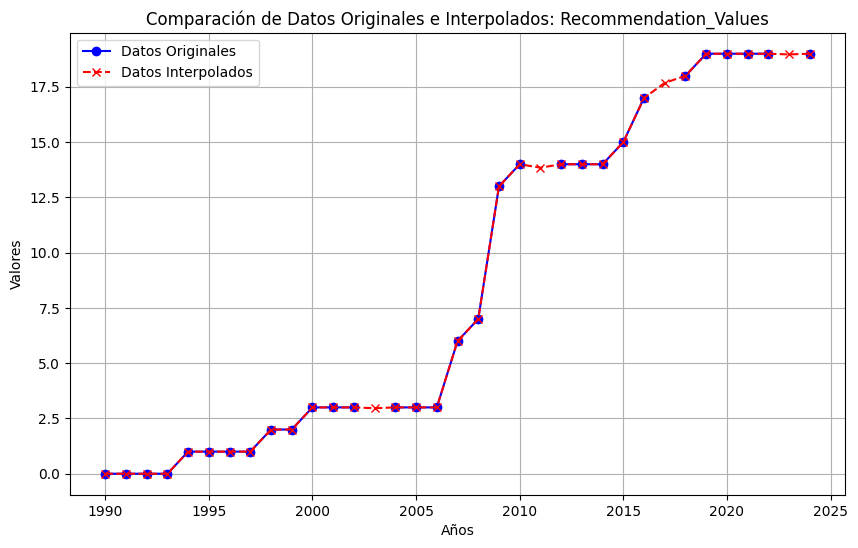

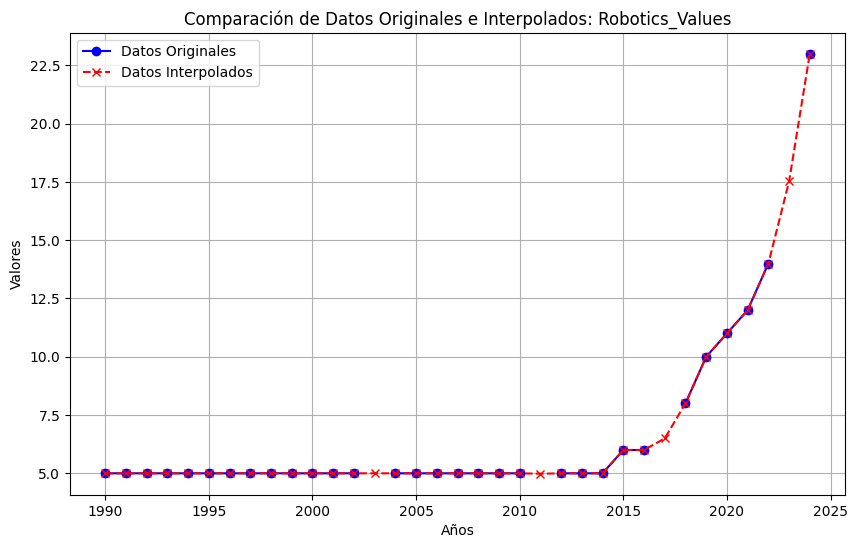

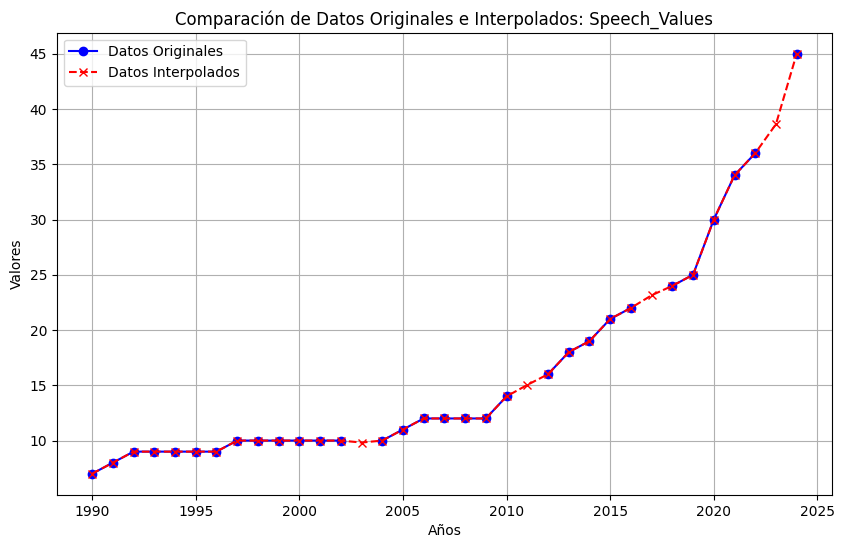

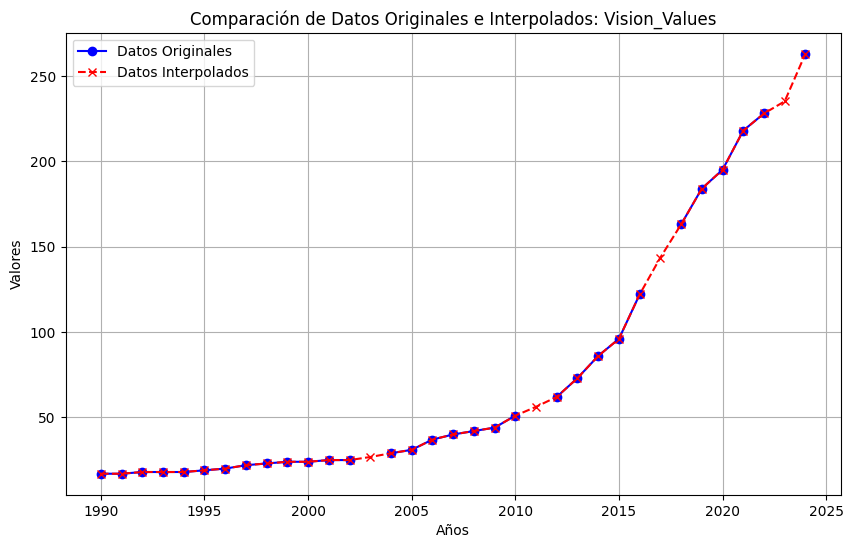

In [67]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Convertir las columnas a numéricas si no lo están
df_clean[columnas_a_convertir] = df_clean[columnas_a_convertir].apply(pd.to_numeric, errors='coerce')

# Iterar sobre cada columna y aplicar la interpolación solo en los valores faltantes
for column in columnas_a_convertir:
    # Extraer los índices de los valores no nulos
    x = np.arange(len(df_clean))
    y = df_clean[column].values
    
    # Crear una máscara para los valores no nulos
    mask = ~np.isnan(y)
    
    # Interpolación por splines cúbicos solo en los valores nulos
    spline = CubicSpline(x[mask], y[mask])
    
    # Solo reemplazar los valores que son nulos
    y_interpolated = y.copy()
    y_interpolated[~mask] = spline(x[~mask])
    
    # Asegurarnos de que no haya valores negativos, los ajustamos a 0 si es necesario
    y_interpolated = np.where(y_interpolated < 0, 0, y_interpolated)
    
    # Actualizar la columna en el DataFrame
    df_clean[f'interpolated_{column}'] = y_interpolated

# Verificar si quedan valores nulos después de la interpolación
print(df_clean.isnull().sum())

# Mostrar las primeras filas para observar el resultado
print(df_clean.head())


# Graficar los valores originales vs los interpolados para cada columna
for column in columnas_a_convertir:
    plt.figure(figsize=(10, 6))

    # Graficar datos originales (solo los valores no nulos)
    plt.plot(df_compare['Biology_year'], df_compare[column], label='Datos Originales', marker='o', linestyle='-', color='blue')

    # Graficar datos interpolados
    plt.plot(df_clean['Biology_year'], df_clean[f'interpolated_{column}'], label='Datos Interpolados', marker='x', linestyle='--', color='red')

    # Añadir etiquetas y leyenda
    plt.title(f'Comparación de Datos Originales e Interpolados: {column}')
    plt.xlabel('Años')
    plt.ylabel('Valores')
    plt.legend()
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()


In [68]:
df_clean

,Biology_year,Biology_Values,Games_year,Games_Values,Image_Generation_year,Image_Generation_Values,Language_year,Language_Values,Recommendation_year,Recommendation_Values,...,Vision_year,Vision_Values,interpolated_Biology_Values,interpolated_Games_Values,interpolated_Image_Generation_Values,interpolated_Language_Values,interpolated_Recommendation_Values,interpolated_Robotics_Values,interpolated_Speech_Values,interpolated_Vision_Values
1,1990,0.000000,1990,4.000000,1990,0.000000,1990,2.000000,1990,0.000000,...,1990,17.000000,0.000000,4.000000,0.000000,2.000000,0.000000,5.000000,7.000000,17.000000
2,1991,0.000000,1991,4.000000,1991,0.000000,1991,3.000000,1991,0.000000,...,1991,17.000000,0.000000,4.000000,0.000000,3.000000,0.000000,5.000000,8.000000,17.000000
3,1992,0.000000,1992,5.000000,1992,0.000000,1992,3.000000,1992,0.000000,...,1992,18.000000,0.000000,5.000000,0.000000,3.000000,0.000000,5.000000,9.000000,18.000000
4,1993,0.000000,1993,5.000000,1993,0.000000,1993,4.000000,1993,0.000000,...,1993,18.000000,0.000000,5.000000,0.000000,4.000000,0.000000,5.000000,9.000000,18.000000
5,1994,0.000000,1994,5.000000,1994,0.000000,1994,4.000000,1994,1.000000,...,1994,18.000000,0.000000,5.000000,0.000000,4.000000,1.000000,5.000000,9.000000,18.000000
6,1995,0.000000,1995,5.000000,1995,0.000000,1995,5.000000,1995,1.000000,...,1995,19.000000,0.000000,5.000000,0.000000,5.000000,1.000000,5.000000,9.000000,19.000000
7,1996,0.000000,1996,5.000000,1996,0.000000,1996,6.000000,1996,1.000000,...,1996,20.000000,0.000000,5.000000,0.000000,6.000000,1.000000,5.000000,9.000000,20.000000
8,1997,0.000000,1997,6.000000,1997,0.000000,1997,7.000000,1997,1.000000,...,1997,22.000000,0.000000,6.000000,0.000000,7.000000,1.000000,5.000000,10.000000,22.000000
9,1998,0.000000,1998,6.000000,1998,0.000000,1998,7.000000,1998,2.000000,...,1998,23.000000,0.000000,6.000000,0.000000,7.000000,2.000000,5.000000,10.000000,23.000000
10,1999,0.000000,1999,6.000000,1999,0.000000,1999,9.000000,1999,2.000000,...,1999,24.000000,0.000000,6.000000,0.000000,9.000000,2.000000,5.000000,10.000000,24.000000


### 6. Conclusión del Equipo de Investigación

En el presente análisis, se utilizaron métodos de interpolación por **splines cúbicos** para rellenar los datos faltantes en un conjunto de datos acumulativos. Se concluye que este enofque no fue totalmente adecuados para los datos analizados debido a la naturaleza acumulativa del conjunto.

#### Resultados y Limitaciones:
- **Inconsistencias en la acumulación**: Los métodos aplicados generaron resultados en los que algunos valores interpolados eran mayores que los correspondientes a años posteriores. Esta inconsistencia es inaceptable para un conjunto de datos acumulativos, donde los valores deberían ser **monótonos no decrecientes**.
  
- **Naturaleza de los métodos de interpolación**: Los splines cúbicos están diseñados para suavizar las transiciones entre puntos, pero no garantizan que los valores interpolados sigan una tendencia estrictamente creciente, lo que puede llevar a fluctuaciones en los datos. De manera similar, el método de Hermite, aunque más conservador, no impone restricciones de monotonía, lo que contribuyó a la aparición de estas inconsistencias.

- **Influencia de los saltos en los datos**: La presencia de grandes diferencias entre los valores de los años conocidos también afectó la capacidad de estos métodos para interpolar de manera adecuada. Los métodos aplicados tienden a suavizar estas transiciones, lo que en algunos casos resultó en sobreestimaciones o subestimaciones.

#### Recomendaciones:
Para evitar este tipo de inconsistencias en futuros análisis de datos acumulativos, recomendamos el uso de métodos de interpolación que preserven la **monotonía de los datos**, como el **PCHIP (Piecewise Cubic Hermite Interpolating Polynomial)**, que asegura que los valores interpolados sean crecientes o, al menos, no decrecientes.

En los casos donde la interpolación no pueda garantizar los resultados esperados, sugerimos la **verificación manual** de los datos, con ajustes posteriores para garantizar que se mantenga la naturaleza acumulativa de los mismos. Métodos de relleno más simples, como el relleno hacia adelante (forward fill), también pueden ser adecuados cuando los datos faltantes son limitados.

En conclusión, aunque los métodos de interpolación por splines cúbicos y Hermite pueden ser útiles en ciertos contextos, no son ideales para datos acumulativos sin ajustes adicionales que garanticen la consistencia en la progresión de los valores.